# Random Forest : Diabetes Dataset

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Data

In [2]:
# Loading data
df_diab = pd.read_csv("./Resources/diabetes.csv")
df_diab.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df_clean = df_diab.copy()

In [4]:
df_clean[df_clean.columns[1:5]]==0

,Glucose,BloodPressure,SkinThickness,Insulin
0,False,False,False,True
1,False,False,False,True
2,False,False,True,True
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
763,False,False,False,False
764,False,False,False,True
765,False,False,False,False
766,False,False,True,True


In [5]:
df_2 = df_clean[~(df_clean[df_clean.columns[1:5]]==0).any(axis=1)]

In [6]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [7]:
# Define features set

X = df_2.copy()
X.drop("Outcome",axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53
13,1,189,60,23,846,30.1,0.398,59


In [8]:
#check the shape
X.shape

(393, 8)

In [9]:
# Define target vector
y = df_2["Outcome"].ravel()
y[:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [10]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [12]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [13]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [14]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [16]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,63,12
Actual 1,8,16


Accuracy Score : 0.797979797979798
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        75
           1       0.57      0.67      0.62        24

    accuracy                           0.80        99
   macro avg       0.73      0.75      0.74        99
weighted avg       0.81      0.80      0.80        99



## Feature Importance

In [19]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2618567141022278, 'Glucose'),
 (0.16573653639619249, 'Insulin'),
 (0.13498664818910877, 'Age'),
 (0.10764093636716672, 'DiabetesPedigreeFunction'),
 (0.10540090628460873, 'BMI'),
 (0.07788164789316386, 'SkinThickness'),
 (0.07565981076947101, 'Pregnancies'),
 (0.07083679999806068, 'BloodPressure')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

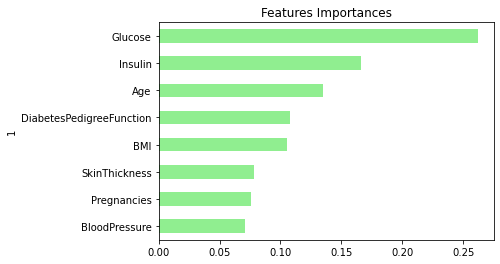

In [20]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)